<br/>
<span style="font-size: 3em;"> 🚢🐼🌳 Engenharia de Features com Pandas</span>

Neste `notebook` vamos estudar a biblioteca `pandas` usando um conjunto de dados dos passageiros do **RMS Titanic**. Por último tentaremos extrair informações dos dados a partir de árvores de decisão.

![Pandas](dados/944693_1_1029_panda_diplomacy_standard.jpg)


## O Que é `pandas`?

> ### Python Data Analysis Library
> Um conjunto de ferramentas para análise de dados em `Python`.

# 1. DataFrames
A estrutura de dados mais utilizada em `pandas` é o [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), que armazena os dados na forma de uma tabela. Os dados são indexados pelas colunas ( _columns_ ) e pelas linhas ( _indexes_ ).

Os `DataFrames` também possuem diversos métodos para computar estatísticas e processar os dados.

Existem várias maneiras de declarar um `DataFrame`. Uma forma comum é passar um dicionário (`dict`) onde as chaves são as colunas e os valores são listas das linhas:

In [2]:
import pandas as pd
from sklearn import metrics, tree

# Podem ignorar os imports abaixo
import os
if os.name == "nt":
    os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
PALETA = [item["color"] for item in list(mpl.rcParams['axes.prop_cycle'])]

In [2]:
dados = {
    "bamboo": [0, 10, 20],
    "taquara": [5, 15, 25],
    "grama": [-1, -2, None],
}
df_panda = pd.DataFrame(dados)
df_panda

,bamboo,taquara,grama
0,0,5,-1.0
1,10,15,-2.0
2,20,25,NaN


O valor de retorno da última linha de um bloco de código é exibido no notebook, por isso a tabela acima é exibida.

Também é possível passar apenas os valores e declarar as colunas ou linhas no construtor do `DataFrame`:

In [3]:
dados = [[0, 5, -1], [10, 15, -2], [20, 25, None]]
pd.DataFrame(dados, columns=["bamboo", "taquara", "grama"])

,bamboo,taquara,grama
0,0,5,-1.0
1,10,15,-2.0
2,20,25,NaN


Provavelmente as formas mais utilizadas para carregar um `DataFrame` são aquelas que carregam dados em disco. Entre os formatos suportados estão:
1. CSV
1. Excel
1. HDFS
1. JSON
1. Pickle
1. Parquet
1. SQL

Temos um arquivo `csv` de exemplo em `dados/train.csv`. As primeiras linhas do arquivo são:

In [4]:
ARQUIVO_TRAIN = "dados/train.csv"

with open(ARQUIVO_TRAIN, "r") as fp:
    dados = fp.read()
    print("O arquivo: {0} contém {1} linhas\n".format(ARQUIVO_TRAIN, len(dados.split("\n"))-1))
    print("\n".join(dados.split("\n")[:5]))

O arquivo: dados/train.csv contém 891 linhas

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


Para abrir um arquivo `csv` basta invocar a função `read_csv` do `pandas`. Os métodos `head` e `tail` permitem investigar o começo e o fim do `DataFrame`.

In [6]:
df = pd.read_csv(ARQUIVO_TRAIN)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Vamos usar o método `head` para mostrar apenas um pedaço dos `DataFrames` daqui em diante.

----
## Exercícios

### E1.1:
Declare um `DataFrame` com o nome `df_test` abrindo o arquivo `dados/test.csv` usando a função `read_csv`.

In [ ]:
# Preencher a linha abaixo
df_test = 

# Esta linha serve pra mostrar o DataFrame
df_test.head()

#### E1.2:
Declare um `DataFrame` com o nome de `df_filmes` contendo os seguintes dados:

|Filme|Ano|País|Amor|
|---|---|---|---|
|Saved from The Titanic|1912|Estados Unidos|False|
|In Nacht und Eis|1912|Alemanha|False|
|Atlantik|1929|Inglaterra/Alemanha|False|
|Titanic|1943|Alemanha|False|
|Titanic|1953|Estados Unidos|False
|A Night to Remember|1958|Inglaterra|False|
|Titanica|1992|Estados Unidos/Russia/Canadá|False|
|Titanic|1997|Estados Unidos|True|
|La leggenda del Titanic|1999|Itália|False|
|Ghosts of the Abyss|2003|Estados Unidos|False|
|[Titanic II](https://en.wikipedia.org/wiki/Titanic_II_(film))|2010|Estados Unidos|False|

In [ ]:
### Responder nas linhas abaixo
df_filmes = 











###

# Esta linha serve pra mostrar o DataFrame
df_filmes

# 2. ... near, far, wherever you are

<img src="dados/titanic-movie-promo-stills-wallpaper-4.jpg" width=800>

Vamos entender um pouco do conjunto de dados que acabamos de carregar. 

Pra quem nunca viu o filme, o navio **RMS Titanic**, considerado inaufragável, partiu no dia 10 de abril de 1912 de Southampton com destino à Nova York, fazendo paradas em Cherbourg e Queenstown. Ás 23:40 da noite do dia 14 de abril o navio colidiu com um iceberg danificando o lado de estibordo da embarcação e iniciando a inundação de 5 compartimentos, o que inevitávelmente causaria seu naufrágio.

![Mapa Titanic](dados/Titanic_voyage_map.png)

O navio se parte ao meio às 2:20 da madrugada ainda com mais de 1000 passageiros à bordo. Das estimadas 2224 pessoas à bordo, cerca de 705 sobreviveram. O Titanic estava a dois dias de viagem de seu destino.

### [spoilers]
> Nesse meio tempo Rose, que está noiva, conhece Jack, rola um arrocha, ela larga o boy lixo pra ficar com Jack, o navio afunda e o casal também. Rose consegue subir numa porta à deriva e Jack não tem competência suficiente pra subir na porta e acaba morrendo.

<img src="dados/titanic_door.jpg" width=600>

## Conjunto de dados

Cada linha do conjunto de dados representa um passageiro. As colunas são as seguintes:

1. PassengerId: Id único do passageiro
1. Survived: (1) se o passageiro sobreviveu ao naufrágio, (0) caso contrário
1. Pclass: Classe do passageiro (1ª, 2ª ou 3ª)
1. Name: Nome do passageiro
1. Sex: Sexo do passageiro
1. SibSp: Número de irmãos ou esposo(a)s
1. Parch: Número de pais ou filhos
1. Ticket: Número do ticket
1. Fare: Tarifa da passagem
1. Cabin: Número da cabine
1. Embarked: Cidade em que o passageiro embarcou (C - Cherbourg, S - Southampton, Q - Queenstown)

Os dados são da competição de _Machine Learning_ do [Kaggle](https://www.kaggle.com/c/titanic)

## Definição do problema

O objetivo da competição do [Kaggle](https://www.kaggle.com) no conjunto de dados do **Titanic** é de gerar um modelo capaz de determinar quais passageiros sobreviveram ao naufrágio. 

O _Kaggle_ fornece um conjunto de dados dividido em duas partes, a primeira consiste de uma lista com 891 passageiros e suas características (features), como vimos anteriormente, chamaremos esta fatia dos dados de _conjunto de treino_ . A segunda parte é uma lista com 418 passageiros com as mesmas características, exceto pela coluna `Survived`, que somente o _Kaggle_ tem acesso, chamaremos essa outra parte dos dados de _conjunto de testes_ .

> O objetivo então é gerar a coluna `Survived` para a segunda parte do conjunto de dados e enviar os dados para o _Kaggle_ , que calcula a quantidade de acertos.

Podemos explorar os dados de teste através do `DataFrame` `df_teste`:

In [8]:
ARQUIVO_TESTE = "dados/test.csv"
df_teste = pd.read_csv(ARQUIVO_TESTE)
df_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# Fique à vontade para explorar o DataFrame


Antes de <span style="font-size: 1.5em">mergulhar 🤦</span> no problema, vamos entender um pouco mais sobre `DataFrames`. Vamo pré-processar os dados e
isso vai ser util para entender as operações que faremos posteriormente.

## 2.1. Indexação e Seleção de dados
O método `loc` é utilizado para selecionar dados no `DataFrame`. Este método implementa o `__getitem__`, ou seja, ao contrário de `__call__` que usa parênteses `()` para chamar uma função, esse método é invocado por colchetes `[]`.

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para ler uma linha do `DataFrame` basta passar um único índice para o método `loc`:

In [11]:
df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

Também é possível passar um intervalo para o método:

In [12]:
df.loc[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Ou então uma lista de índices:

In [13]:
df.loc[[0, 3, 5]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Para um `DataFrame` também é possível selecionar colunas com o método `loc` usando o segundo argumento:

In [14]:
df.loc[:, ["Name"]].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Outra forma de indexação é feita diretamente sobre o objeto do `DataFrame` usando colchetes `[]` (`__getitem__`), selecionando as colunas. Chamaremos este modo de **indexação básica**.

In [15]:
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [16]:
df[["Name"]].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Qual é a diferença das duas últimas chamadas?

```python 
df["name"].head()
# e #
df[["name"]].head()
```

> ### Pandas Series
É importante ressaltar que existe outra estrutura de dados importante em `pandas` que se chama [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). Esta estrutura representa uma sequência de dados de apenas uma dimensão, enquanto o `DataFrame` tem duas dimensões. Análogamente as `Series` seriam equivalentes a **listas** enquanto os `DataFrame`s seriam equivalentes à **matrizes**. Muitos métodos dessas duas estruturas são idênticos.
>
> Uma instância de uma `Series` é feita com a classe `pd.Series`.

In [25]:
pd.Series(["🚢", "🧊", "🕳️", "💀"])

0     🚢
1     🧊
2    🕳️
3     💀
dtype: object

---
## Exercícios

### E2.1.1
Qual é o nome do passageiro na linha `456`?

### E2.1.2
Selecione a coluna `Cabin` dos passageiros das linhas `600` até `610`

## 2.2. Indexação Booleana

Algumas operações em `pandas` retornam séries *booleanas*, que podem ser usadas para selecionar (filtrar) os dados. As formas mais comuns de filtragem envolvem a utilização dos operadores de comparação do `python`.

Para selecionar apenas os passageiros da primeira classe, primeiramente é preciso constrir uma `Series` booleana:

In [26]:
(df["Pclass"] == 1).head(20)

0     False
1      True
2     False
3      True
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: Pclass, dtype: bool

Com a `Series` é possível usar a **indexação básica** para filtrar os dados:

In [27]:
df[df["Pclass"] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


Também é possível usar operadores lógicos e criar filtros mais complexos. Para selecionarmos os passageiros do sexo feminino e que embarcaram em _Cherbourg_ podemos fazer o seguinte:

* Primeiro criamos um filtro para o sexo feminino

In [28]:
filtro_sexo_f = df["Sex"] == "female"
filtro_sexo_f.head(10)

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7    False
8     True
9     True
Name: Sex, dtype: bool

* Criamos outro filtro para os passageiros que embarcaram em _Cherbourg_

In [29]:
filtro_embarque_c = df["Embarked"] == "C"
filtro_embarque_c.head(10)

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: Embarked, dtype: bool

* Usamos o operador _and_ (`&`) para criar um terceiro filtro de ambas as condições

In [30]:
filtro_sexo_f_e_embarque_c = filtro_sexo_f & filtro_embarque_c
filtro_sexo_f_e_embarque_c.head(10)

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

In [31]:
df[filtro_sexo_f_e_embarque_c].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


---
## Exercícios
### E2.2.1 
Selecione apenas os passageiros com mais de 50 anos

### E2.2.2 
Selecione os passageiros que pagaram uma tarifa menor que £10 e que sobreviveram.

## 2.3. Atribuição de valores
Para atribuir um valor à uma célula é preciso usar o método `loc`:

In [32]:
df_panda

,bamboo,taquara,grama
0,0,5,-1.0
1,10,15,-2.0
2,20,25,NaN


In [33]:
df_panda.loc[2, "grama"] = -3
df_panda

,bamboo,taquara,grama
0,0,5,-1.0
1,10,15,-2.0
2,20,25,-3.0


Para atribuir valores à uma coluna basta usar a indexação direta:

In [34]:
df_panda["floresta"] = "densa"
df_panda

,bamboo,taquara,grama,floresta
0,0,5,-1.0,densa
1,10,15,-2.0,densa
2,20,25,-3.0,densa


A atribuição por coluna também pode receber uma série:

In [35]:
df_panda["bamboo"] >= 20

0    False
1    False
2     True
Name: bamboo, dtype: bool

In [36]:
df_panda["muito bamboo"] = df_panda["bamboo"] >= 20
df_panda

,bamboo,taquara,grama,floresta,muito bamboo
0,0,5,-1.0,densa,False
1,10,15,-2.0,densa,False
2,20,25,-3.0,densa,True


Por último, para adicionar linhas ao `DataFrame` basta usar o método `append`:

In [37]:
df_panda = df_panda.append({
    "bamboo": 30,
    "taquara": 35,
    "muito bamboo": True
}, ignore_index=True)
df_panda

,bamboo,taquara,grama,floresta,muito bamboo
0,0,5,-1.0,densa,False
1,10,15,-2.0,densa,False
2,20,25,-3.0,densa,True
3,30,35,NaN,NaN,True


---
## Exercícios

### E2.3.1
Preencha a célula da linha `4` e coluna `grama` com o valor `-4` em `df_panda`:

### E2.3.2
Adicione uma linha ao `DataFrame` `df_panda`:

### E2.3.3
Adicione uma coluna ao `DataFrame` `df_panda`:

## 2.4. Dados faltantes
Não há garantias que as tabelas que trabalhamos estejam completas. Decidir o que fazer com os dados faltantes é algo que deve ser estudado caso a caso. 
O método `isnull` retorna um `DataFrame` booleano onde os valores indicam há falta de dados.

In [38]:
df.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


Como muitos métodos dos `DataFrame`s retornam outro `DataFrame`, podemos encadenar métodos. Podemos por exemplo verificar quais linhas possuem algum dado faltante encadenando o método `any` que verifica se **algum** elemento é **verdadeiro**.

In [39]:
df.isnull().any(axis=1).head(20)

0      True
1     False
2      True
3     False
4      True
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
dtype: bool

In [40]:
null_cabin = df["Cabin"].isnull().sum()
"{0} dados faltantes na coluna 'Cabin' ({1:.3}% do total)".format(null_cabin, 100*null_cabin/len(df))

"687 dados faltantes na coluna 'Cabin' (77.1% do total)"

> O argumento `axis=1` serve para indicar que queremos comparar os elementos em uma linha. Por padrão o método usa `axis=0`, ou seja, compara os valores em uma coluna.

> #### O método `all` verifica se **todos** os elementos são **verdadeiros**.

### 2.4.1. Eliminando colunas
Uma opção para lidar com colunas contendo poucos dados é apenas eliminá-la com o método `drop`. Os métodos de um `DataFrame` retornam uma cópia do mesmo, portanto podemos substituir o `DataFrame` antigo (`df`) pela cópia após a aplicação do método usando uma atribuição:

In [41]:
df = df.drop(columns="Cabin")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 2.4.2. Eliminando linhas
Outra opção é remover linhas. Dessa vez é interessante que existam poucas linhas com dados faltantes de determinada coluna.

In [42]:
df.isnull().head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False


Aproveitamos aqui para introduzir outra computação. O método `sum` soma os os valores em uma coluna (`axis=0` por padrão). Somando os valores `True`, equivalentes a `1`, oposto de `False` $\equiv$ `0`, temos a contagem das linhas vazias:

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Como a coluna `Embarked` possui apenas 2 linhas vazias podemos descartá-la sem perder muitos dados.

In [44]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [45]:
df.loc[59:63]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S


Para descartar esses dados podemos usar o método `drop` passando `index` como argumento:

In [47]:
df.drop(index=[61, 829]).loc[59:63]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S


Remover `index` (índices) deixa o `DataFrame` com lacunas em seus índices. Caso o índice não seja relevante para o problema, é possível recriá-lo com o método `reset_index`:

In [49]:
df.drop(index=[61, 829]).reset_index(drop=True).loc[59:63]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
61,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
62,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S
63,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,C


As vezes é preferível filtrar o `DataFrame` ao invés de usar o método `drop`. Podemos usar o método `notnull` ou inverter o método `isnull` com o operador `~` (not):

In [50]:
df["Embarked"].notnull()[59:63]

59     True
60     True
61    False
62     True
Name: Embarked, dtype: bool

In [51]:
~df["Embarked"].isnull()[59:63]

59     True
60     True
61    False
62     True
Name: Embarked, dtype: bool

Comparando as duas formas de determinar itens não nulos verificamos que ambas são equivalentes:

In [52]:
(~df["Embarked"].isnull() == df["Embarked"].notnull()).all()

True

In [53]:
df = df[df["Embarked"].notnull()].reset_index(drop=True)
df.loc[59:63]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
61,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
62,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S
63,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,C


### 2.4.3. Preenchendo valores vazios (Imputação de dados)
Até agora lidamos com dados faltantes apenas eliminando tais elementos, entretanto a coluna `Age` (Idade) possui cerca de $1/5$ de seus valores faltantes. Seria um grande desperdício deletar esta coluna ou as linhas das quais esta coluna está vazia.

In [54]:
"A coluna 'Age' tem {:.2f}% de dados faltantes".format(df["Age"].isnull().sum()/len(df)*100)

"A coluna 'Age' tem 19.91% de dados faltantes"

Podemos então utilizar outra técnica, a _imputação de dados_. Com ela, criamos valores para os dados faltantes. Existem métodos elegantes para criar estes dados, neste notebook vamos usar os mais simples: `média`, `mediana` e `moda`. Estas três operações são estatísticas que podemos calcular facilmente com o `DataFrame`:

Text(0, 0.5, 'Frequência')

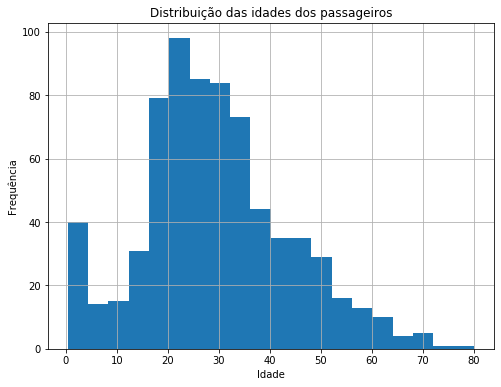

In [55]:
ax = df["Age"].hist(bins=20, figsize=(8, 6))
ax.set_title("Distribuição das idades dos passageiros")
ax.set_xlabel("Idade")
ax.set_ylabel("Frequência")

A _média_ corresponde à soma dos valores dividida pela quantidade de elementos:

ex: A média de **28, 29, 29, 30, 31, 31** é: $(28+29+29+30+31+31)/6 = 29.66...$

In [56]:
df["Age"].mean()

29.64209269662921

A _mediana_ é o elemento central numa lista ordenada dos valores

ex: **1, 1, ... 27, 28, <span style="color: red">28</span>, 28, 29, ... 80, 81**

In [57]:
df["Age"].median()

28.0

A _moda_ representa o valor que mais se repete dentre os elementos.

ex: **20, 21, 22, <span style="color: red">24, 24, 24,</span> 27, 28**. O número **24** é que mais se repete.

In [58]:
df["Age"].mode()[0]

24.0

Usando o método `fillna` podemos preencher os valores faltantes da coluna `Age`. Vamos preencher com o valor da `mediana`.

Text(0, 0.5, 'Frequência')

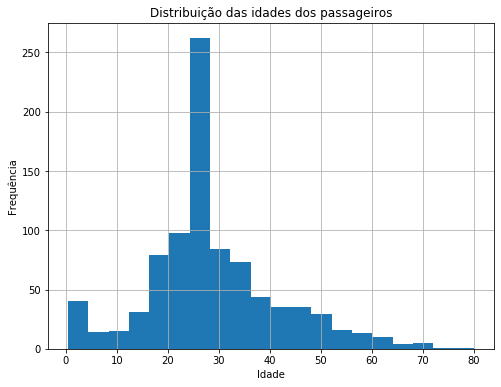

In [59]:
df["Age"] = df["Age"].fillna(df["Age"].median())
ax = df["Age"].hist(bins=20, figsize=(8, 6))
ax.set_title("Distribuição das idades dos passageiros")
ax.set_xlabel("Idade")
ax.set_ylabel("Frequência")

Vemos que a distribuição das idades fica bastante alterada, mas pelo menos temos uma tabela com todos os valores preenchidos.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


---
## Exercícios

# SE PREPAREM!

### E2.4.1
Qual é a média do valor da passagem paga pelos passageiros da terceira classe? e da primeira classe?

### E2.4.2
Quantos passageiros que estão no `DataFrame` `df` sobreviveram ao naufrágio?

### E2.4.3
Quais são as taxas de sobrevivência dos passageiros de cada uma das três classes?

### E2.4.4
Qual é a taxa de sobrevivência  dos passageiros de até 16 anos? e com 16 ou mais?

### E2.4.5
Qual é a taxa de sobrevivência dos passageiros do sexo feminino? e do sexo masculino?

---
<span style="font-size: 2em">Phew!</span> Já cobrimos muita coisa:
* DataFrames
* Series
* Indexação e Seleção de Dados
* Indexação Booleana
* Atribuição de Valores
* Métodos do DataFrame
* Dados faltantes

Também pudemos tirar algumas conclusões sobre os dados do naufrágio do **Titanic**:

1. Passageiros da primeira classe tem uma taxa de sobrevivência maior:
2. Passageiros com menos de 16 anos tem uma taxa de sobrevivência maior
3. Passageiros do sexo feminino tem uma taxa de sobrevivência maior
4. Quem morre é homem, adulto e pobre.

Confira se seus cálculos dos últimos três exercícios estão corretos abaixo:

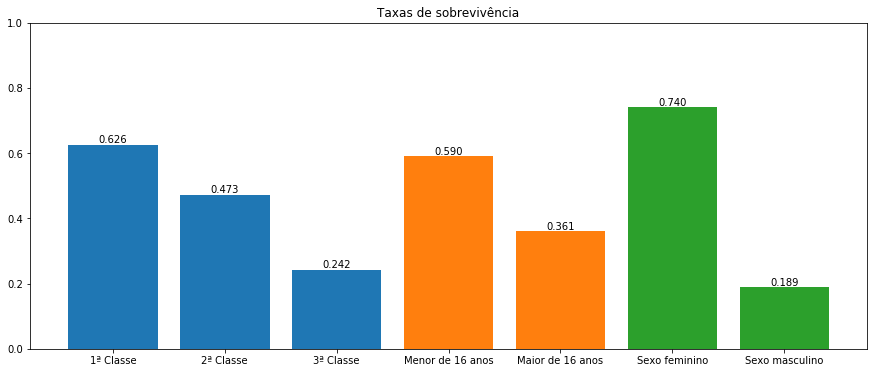

In [61]:
filtros = [
    ("1ª Classe", df["Pclass"] == 1, PALETA[0]),
    ("2ª Classe", df["Pclass"] == 2, PALETA[0]),
    ("3ª Classe", df["Pclass"] == 3, PALETA[0]),
    ("Menor de 16 anos", df["Age"] < 16, PALETA[1]),
    ("Maior de 16 anos", df["Age"] >= 16, PALETA[1]),
    ("Sexo feminino", df["Sex"] == "female", PALETA[2]),
    ("Sexo masculino", df["Sex"] == "male", PALETA[2]),
]
eixo_x = []
eixo_y = []
paleta = []
for categoria, filtro, cor in filtros:
    eixo_x.append(categoria)
    eixo_y.append(df[filtro]["Survived"].sum()/len(df[filtro]))
    paleta.append(cor)

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_ylim(0, 1)
ax.set_title("Taxas de sobrevivência")
rects = ax.bar(
    eixo_x, eixo_y,
    color=paleta,
)
for rect in rects:
    height = rect.get_height()
    ax.annotate("{:.3f}".format(float(height)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                ha="center", va='bottom')

# 3. Árvores à bordo!
![Árvore](dados/df3f9f4bbba80a7547023b2823e6f0eb.jpg)


Para modelar os dados usaremos **Árvores de decisão**, um método de aprendizado de máquina que se utiliza de um grafo em formato de árvore binária para tomar as decisões:

![arvore engenharia](dados/tumblr_lui1cu0BzO1qe69yqo1_500.jpg)

A árvore é composta por nós, que redirecionam para o próximo ramo da árvore, e por nós-folha, que são a decisão ou a classificação. No problema desse dataset temos apenas duas categorias para as folhas, ou o passageiro sobreviveu (**1**), ou o passageiro morreu (**0**).

Vamos usar a biblioteca [scikit-learn](https://scikit-learn.org/stable/) que implementa o modelo numa interface muito simples.

## 3.1. Preparação dos dados
O modelo é capaz de lidar apenas com dados numéricos, então é preciso realizar um pré-processamento. 
* Dados categóricos com apenas duas classes podem ser convertidos para uma coluna binária
* Dados categóricos com mais de duas classes precisam ser convertidos para colunas diferentes (one hot encoding)
* Dados numéricos podem permanecer como estão

No momento vamos nos ater somente às colunas numéricas:


In [62]:
X = df[["Age", "SibSp", "Parch", "Fare"]]
X.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


A saída da árvore de decisão já está num formato numérico, então não precisamos alterá-la.

In [63]:
Y = df["Survived"]
Y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

## 3.2. Avaliação do modelo
A métrica que utilizaremos para avaliar o modelo é a **acurácia**. Esta métrica representa a taxa de acertos do modelo, por exemplo: Se pegarmos os 5 primeiros passageiros:

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Este subconjunto dos dados contém 3 passageiros que sobreviveram ao desastre e 2 que morreram. 

Vamos criar um modelo simples, vamos considerar que todos os passageiros sobreviveram. Como calculamos a acurácia para esse subconjunto?
* Primeiro vamos criar um `DataFrame` contendo duas colunas, a coluna com os dados verdadeiros (coluna `Survived`) e outra com a predição do modelo:

In [65]:
df["predicao simples"] = 1  # Consideramos que todos os passageiros sobreviveram
df[["Survived", "predicao simples"]].head()

,Survived,predicao simples
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1


* Em seguida criamos uma terceira coluna que compara a coluna `Survived` com a coluna `predicao simples`:

In [66]:
df["acertos predicao simples"] = df["Survived"] == df["predicao simples"]
df[["Survived", "predicao simples", "acertos predicao simples"]].head()

,Survived,predicao simples,acertos predicao simples
0,0,1,False
1,1,1,True
2,1,1,True
3,1,1,True
4,0,1,False


* Por último determinamos a razão entre a quantidade de acertos e o tamanho do conjunto de dados. Para estas 5 amostras temos o seguinte:
  * Acertos: 3
  * Tamanho do conjunto de dados: 5
  * Acurácia: 3/5 = 0.6 (60%)

In [67]:
acc = df["acertos predicao simples"].head().sum()/len(df.head())
"Acurácia 5 linhas: {}%".format(100*acc)

'Acurácia 5 linhas: 60.0%'

O `sklearn` possui uma função que calcula a acurácia, precisamos apenas passar a coluna `verdade` e a coluna `predição`:

In [68]:
acc = metrics.accuracy_score(
    df["Survived"].head(), 
    df["predicao simples"].head()
)
"Acurácia 5 linhas: {}%".format(100*acc)

'Acurácia 5 linhas: 60.0%'

A acurácia para todo o conjunto de dados é:

In [69]:
acc_simples = metrics.accuracy_score(
    df["Survived"], 
    df["predicao simples"]
)
"Acurácia: {}%".format(100*acc_simples)

'Acurácia: 38.24521934758155%'

## 3.3.  Árvores de decisão
Vamos jogar os dados na a árvore de decisão: 
1. Primeiro instanciamos a classe `DecisionTreeClassifier`
2. Invocamos o método `fit` para criar a árvore
3. Para realizar predições sobre a árvore basta usar o método `predict`

In [281]:
## Preparação dos dados
X1 = df[["Age", "SibSp", "Parch", "Fare"]]
Y1 = df["Survived"]

# 1. Instanciando o modelo
modelo_arvore1 = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

# 2. Treinando o modelo
modelo_arvore1.fit(X1, Y1)

# 3. Gerando as predições
df["predicao arvore 1"] = modelo_arvore1.predict(X1)
df[["Survived", "predicao arvore 1"]].head(10)

,Survived,predicao arvore 1
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,1,0


In [74]:
acc_arvore1 = metrics.accuracy_score(
    df["Survived"], 
    df["predicao arvore 1"]
)
"Acurácia: {}%".format(100*acc_arvore1)

'Acurácia: 71.09111361079866%'

Conseguimos modelar corretamente 71.1% dos dados! Muito melhor que os 38.2% do _modelo simples_.

O _scikit-learn_ fornece uma interface simples para visualizar as árvores de decisão, com essa visualização podemos tirar algumas conclusões:

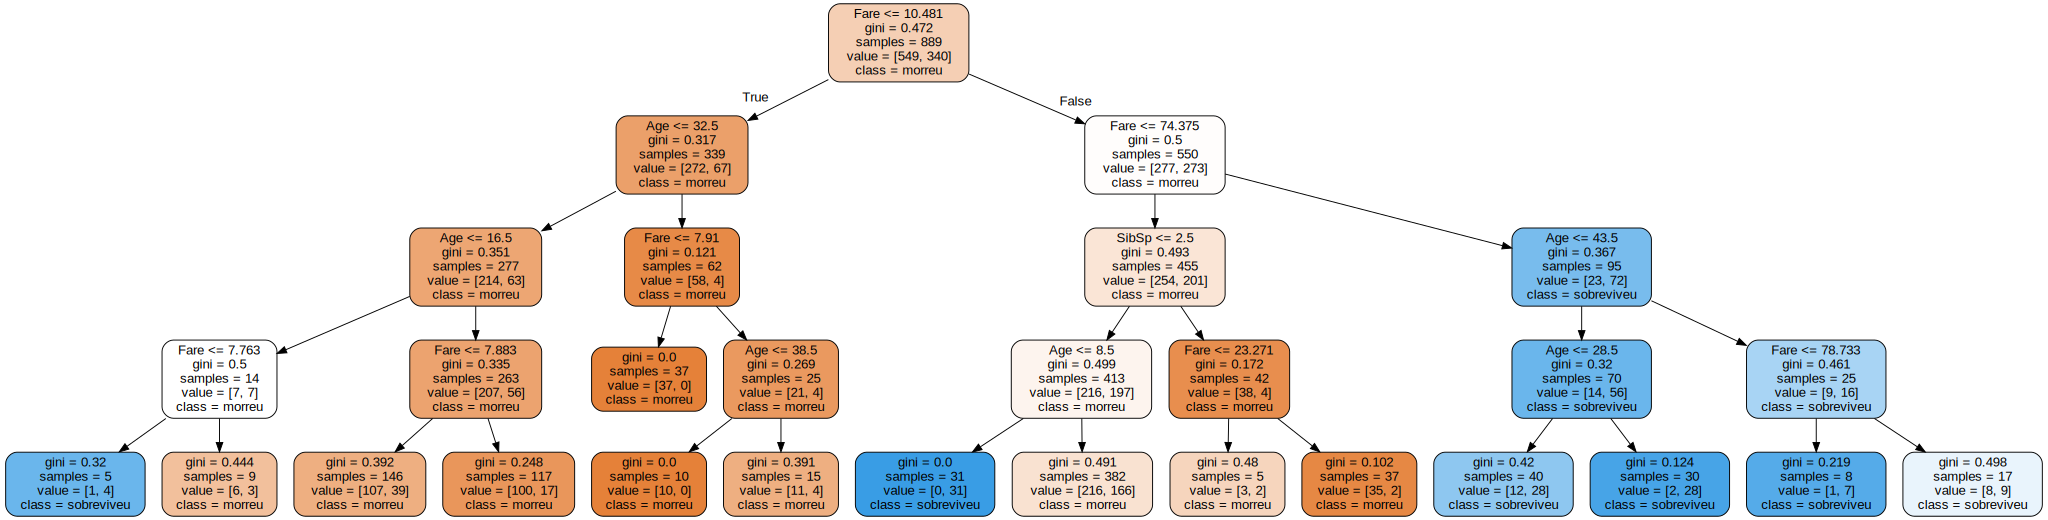

In [86]:
def plot_tree(model, columns, classes):
    dot_data = tree.export_graphviz(
        model,
        out_file=None,
        feature_names=columns,
        class_names=classes,
        filled=True, rounded=True
    )
    graph = graphviz.Source(dot_data)
    return graph
classes = ["morreu", "sobreviveu"]
plot_tree(modelo_arvore1, X1.columns, classes)

Os nós mais coloridos representam os casos dos quais o modelo tem mais certeza na predição. Podemos concluir:
* Os passageiros que pagaram barato nas tarifas (`Fare` $<=$ 10.481) morreram com 80% $(272\div(272+67))$ de probabilidade, epsecialmente os mais velhos (`Age` $>$ _32.5_ ) com 94% $(58\div(58+4))$ de probabilidade.
* Passageiros que pagaram muito nas tarifas (`Fare` $>$ _74.375_ ) tiveram mais chances de sobreviver (24.2% de mortalidade).

---
## Exercícios
### E3.1.
Vamos criar outro modelo, a predição será sorteada aleatóriamente. Primeiro precisamos gerar uma lista com _889_ números aleatórios, use o método `random.random` para gerar números aleatórios:

Dica: método [`append`](https://docs.python.org/3.7/tutorial/datastructures.html) para `lista`

In [76]:
import random
random.seed(2019)

lista_randomica = []
for i in range(889):
    # Complete a linha abaixo
    lista_randomica.append(random.random())

### E3.2.
Crie uma `Series` da lista randômica chamada `sr_randomica`:

In [77]:
sr_randomica = pd.Series(lista_randomica)

### E3.3.
Converta a `Series` `sr_randomica` uma série _boleana_ indicando quais numeros são maiores que 0.5. Nomeie essa `Series` como `pred_randomica`. Essa é a série das predições do modelo:

In [78]:
pred_randomica = sr_randomica > 0.5

### E3.4.
Converta a `Series` `pred_randomica` para o tipo inteiro usando o método [`astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) passando [`int`](https://docs.python.org/3/library/functions.html#int) como parâmetro:

In [79]:
pred_randomica = pred_randomica.astype(int)

### E3.5.
Calcule a acurácia do modelo randômico e a armazene na variável `acc_randomica`:

In [80]:
acc_randomica = metrics.accuracy_score(
    df["Survived"], 
    pred_randomica
)
"Acurácia: {}%".format(100*acc_randomica)

'Acurácia: 47.91901012373454%'

47.9% de acurácia com um modelo randômico!

_Será que conseguimos melhorar ainda mais?_
# 4. Vamos para a casa de máquinas!
![casa de máquinas](dados/media_239607.jpg)
<br/>
Um jeito de tentar melhorar a acurácia é extraindo mais informações dos do conjunto de dados. Realizar operações em conjuntos de dados para extrair mais informações e conhecido como _Engenharia de Features_.

Vamos iniciar investigando os nomes dos passageiros:

In [81]:
df[["Name"]].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


É possível extrair alguma informação relevante do nome dos passageiros?

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.
# CLARO!

## 4.1. Manipulação de Strings

Podemos determinar a hierarquia <span style="font-size: 1.5em">🤮</span> entre os passageiros analisando o prefixo (titulo) atrelado aos nomes. Primeiro vamos procurar pelos prefixos usando [Expressões Regulares](https://pt.wikipedia.org/wiki/Express%C3%A3o_regular), para tanto usamos um dos métodos de [manipulação de strings](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling) do `pandas`, o método `extract`:

In [82]:
expressao_titulo = " ([^. ]+\.)"
df["Prefix"] = df["Name"].str.extract(expressao_titulo)
df[["Prefix", "Name"]].head()

,Prefix,Name
0,Mr.,"Braund, Mr. Owen Harris"
1,Mrs.,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss.,"Heikkinen, Miss. Laina"
3,Mrs.,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr.,"Allen, Mr. William Henry"


Podemos contar a quantidade de cada título com o método para `Series` `value_counts`:

In [83]:
df["Prefix"].value_counts()

Mr.          517
Miss.        181
Mrs.         124
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Don.           1
Ms.            1
Countess.      1
Sir.           1
Mme.           1
Jonkheer.      1
Lady.          1
Capt.          1
Name: Prefix, dtype: int64

In [87]:
df[df["Name"].str.contains("Jonkheer\.")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,predicao simples,acertos predicao simples,predicao arvore 1,Prefix
821,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,1,False,0,Jonkheer.


Jonkheer é o mais baixo título de nobreza Holandês que vem de _jonk_ (jovem, young) e _here_ (senhor, mestre).
<img src="dados/a184e964efa3c63a88549d14cca0fd06.jpg" width=600>
<center><i>Jonkheer Reuchlin e sua esposa Agatha Maria Elink Schuurman</i></center>

Mas o que podemos fazer com essas informações? Podemos criar uma nova coluna nos nossos `DataFrames` para indicar a titularidade de cada passageiro, vamos categorizar os títulos em:
1. Oficiais
  * Capt.
  * Col.
  * Major.
  * Dr.
  * Rev. (Reverendo)
2. Realeza
  * Jonkheer.
  * Don.
  * Sir.
  * Countess.
  * Lady.
3. Mr.
4. Mrs.
  * Mrs. (Mistress, geralmente a esposa que trocou o sobrenome)
  * Ms. (Miss, não indica o estado civil)
  * Mme. (Madame)
  * Dona (Somente no conjunto de dados de teste)
5. Miss./Mlle. (Miss/Mademoiselle, mulheres solteiras)
6. Master (Homens jovens)

Substituindo os títulos antigos temos a seguinte contagem:

In [88]:
titulos = {
    "Capt.": "Officer",
    "Col.": "Officer",
    "Major.": "Officer",
    "Dr.": "Officer",
    "Rev.": "Officer",
    "Jonkheer.": "Royalty",
    "Don.": "Royalty",
    "Sir.": "Royalty",
    "Countess.": "Royalty",
    "Lady.": "Royalty",
    "Mr.": "Mr",
    "Mrs.": "Mrs",
    "Ms.": "Mrs",
    "Mme.": "Mrs",
    "Miss.": "Miss", 
    "Mlle.": "Miss",
    "Master.": "Master",
    "Dona.": "Mrs",
}
def substituir_titulos(linha):
    return titulos[linha]
    
df["Title"] = df["Prefix"].apply(substituir_titulos)
df["Title"].value_counts()

Mr         517
Miss       183
Mrs        126
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

---
## Exercícios

### E4.1.1.
Encontre um passageiro que contenha _Jack_ em seu nome, e outro que contenha _Rose_:

### E4.1.2.
Encontre os passageiros dos quais o `Ticket` que contém a string _CA_ . Atribua o novo `DataFrame` à variável `df_ticket_ca`:

In [ ]:
df_ticket_ca = 
df_ticket_ca.head()

### E4.1.3.
Crie uma `Series` da coluna `Name` de `df_ticket_ca` e atribua à variável `sr_name_ca`:

In [77]:
sr_name_ca = 
sr_name_ca.head()

59          Goodwin, Master. William Frederick
70                  Goodwin, Miss. Lillian Amy
385            Goodwin, Master. Sidney Leonard
479             Goodwin, Master. Harold Victor
677    Goodwin, Mrs. Frederick (Augusta Tyler)
Name: Name, dtype: object

### E4.1.4.
Selecione apenas o sobrenome de `sr_name_ca` e atribua à variável `sr_surname_ca`:
  
    Dica: regex: (^[^,]+)
        ()   : Grupo de seleção
        ^    : Início da linha
        [^,] : Caracteres que não são vírgula
        +    : 1 ou mais caracteres

    Não esqueca de selecionar o match 0.

In [83]:
sr_surname_ca =
sr_surname_ca.head()

59     Goodwin
70     Goodwin
385    Goodwin
479    Goodwin
677    Goodwin
Name: 0, dtype: object

### E4.1.5.
Conte os sobrenomes em `sr_surname_ca`:

## 4.2. Contando Tickets
Muitos tickets têm o mesmo número, então podemos contá-los para incluir uma característica no nosso dataset.
![Ticket](dados/Titanic-auction-brochure-ticket-944182.jpg)

Podemos usar o método `value_counts` para contar os tickets, mas também podemos usar um método mais poderoso, o `groupby`.
    
Este método é muito semelhante ao `GROUP BY` do `SQL` e podemos fazer várias agregações com ele. No nosso exemplo, vamos agrupar os dados pela coluna `Ticket` e contar a quantidade de nomes (coluna `Name`).

In [89]:
df_ticket = df.groupby(["Ticket"])[["Name"]].count()
df_ticket.sort_values("Name", ascending=False).head(10)

,Name
Ticket,
CA. 2343,7
347082,7
1601,7
347088,6
CA 2144,6
3101295,6
382652,5
S.O.C. 14879,5
19950,4


Podemos renomear a coluna de um `DataFrame` com o método `rename`:

In [90]:
df_ticket = df_ticket.rename(columns={"Name": "TicketCount"})
df_ticket.head()

,TicketCount
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1


Para inserir as informações da contagem no `DataFrame` `df` podemos usar o método `merge` (`JOIN` no `SQL`). Vamos unir o dataframe `df` na coluna `Ticket` com o `df_ticket` em seu índice:

In [91]:
df = pd.merge(df, df_ticket, left_on="Ticket", right_index=True).sort_index()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,predicao simples,acertos predicao simples,predicao arvore 1,Prefix,Title,TicketCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,False,0,Mr.,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,True,0,Mrs.,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,True,0,Miss.,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,True,0,Mrs.,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,False,0,Mr.,Mr,1


---
## Exercícios
### E4.2.1.
Conte os _nomes_ (`Name`) dos passageiros agrupando por _sexo_ (`Sex`)e _idade_ (`Age`).

### E4.2.2.
Crie uma coluna _booleana_ no `DataFrame` `df` chamada `Child` onde o valor é `True` quando o passageiro tem menos de 16 anos.

In [148]:
# df["Young"] =
df[df["Young"]].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,predicao simples,acertos predicao simples,predicao arvore 1,Prefix,Title,TicketCount,Young
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,False,0,Master.,Master,4,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,True,0,Mrs.,Mrs,2,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,1,True,1,Miss.,Miss,2,True
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,1,False,0,Miss.,Miss,1,True
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,1,False,0,Master.,Master,5,True


### E4.2.3.
Conte os nomes (`Name`) dos passageiros agrupando os dados pelas colunas `Sex`, `Pclass`, e `Young`. Armazene esses dados no dataframe `df_populacoes_count`.

In [153]:
df_populacoes_count = 

df_populacoes_count  # Somente para mostrar o `DataFrame`

Name
Sex    Pclass Young      
female 1      False    89
              True      3
       2      False    66
              True     10
       3      False   114
              True     30
male   1      False   119
              True      3
       2      False    99
              True      9
       3      False   319
              True     28

### E4.2.4.
Some a coluna `Survived` dos passageiros agrupando os dados pelas colunas `Sex`, `Pclass`, e `Young`. Armazene esses dados no dataframe `df_populacoes_survived`.

Dica: Para somar troque o `count` por `sum`.

In [151]:
df_populacoes_survived = 

df_populacoes_survived  # Somente para mostrar o `DataFrame`

Survived
Sex    Pclass Young          
female 1      False        87
              True          2
       2      False        60
              True         10
       3      False        56
              True         16
male   1      False        42
              True          3
       2      False         8
              True          9
       3      False        38
              True          9

### E4.2.4.
Divida a coluna `Survived` de `df_populacoes_survived` pela coluna `Name` de `df_populacoes_count`. Armazene esses dados em `df_populacoes_rate`:

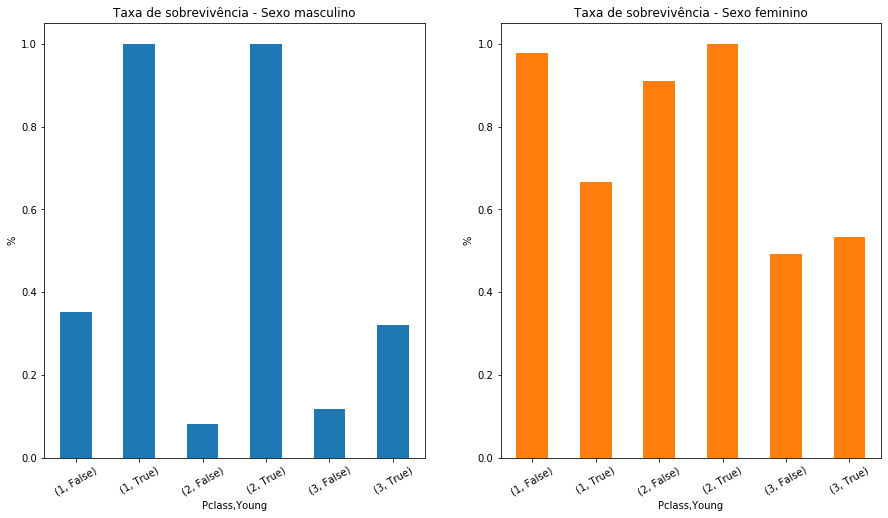

In [232]:
df_populacoes_rate = 

# O código abaixo é para plotar, não altere.
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
pd.DataFrame(df_populacoes_rate.loc["male"]).plot.bar(figsize=(15, 8), rot=30, ax=ax[0], color=PALETA[0])
pd.DataFrame(df_populacoes_rate.loc["female"]).plot.bar(figsize=(15, 8), rot=30, ax=ax[1], color=PALETA[1])
ax[0].set_title("Taxa de sobrevivência - Sexo masculino")
ax[1].set_title("Taxa de sobrevivência - Sexo feminino")
ax[0].set_ylabel("%")
ax[1].set_ylabel("%")
ax[0].legend().remove()
ax[1].legend().remove()

O agrupamento é uma ferramenta poderosa. Podemos resumir todos os passos que fizemos anteriormente em apenas uma linha:

In [242]:
df.groupby(["Sex", "Pclass", "Young"]).agg({"Name": "count", "Survived": ["sum", "mean"]}).rename()

Name Survived          
                    count      sum      mean
Sex    Pclass Young                         
female 1      False    89       87  0.977528
              True      3        2  0.666667
       2      False    66       60  0.909091
              True     10       10  1.000000
       3      False   114       56  0.491228
              True     30       16  0.533333
male   1      False   119       42  0.352941
              True      3        3  1.000000
       2      False    99        8  0.080808
              True      9        9  1.000000
       3      False   319       38  0.119122
              True     28        9  0.321429

## 4.3. Operações em colunas
O `pandas` permite fazer diversas operações numéricas de maneira muito simples e intuitiva:
* `+` &nbsp;&nbsp;$\rightarrow$ `__add__`
* `-` &nbsp;&nbsp;$\rightarrow$ `__sub__`
* `*` &nbsp;&nbsp;$\rightarrow$ `__mul__`
* `/` &nbsp;&nbsp;$\rightarrow$ `__div__`
* `//` $\rightarrow$ `__floordiv__`
* `**` $\rightarrow$ `__pow__`
* `%` &nbsp;&nbsp;$\rightarrow$ `__mod__`
* `|` &nbsp;&nbsp;$\rightarrow$ `__or__`
* `&` &nbsp;&nbsp;$\rightarrow$ `__and__`
* `^` &nbsp;&nbsp;$\rightarrow$ `__xor__`
 
Podemos determinar a quantidade de parentes por passageiro somando as características `SibSp` (Irmãos/Esposo(a)s) e `Parch` (Pais/Filhos). Vamos armazenar essa informação numa nova coluna `FamilySize`:

In [243]:
df["FamilySize"] = df["SibSp"] + df["SibSp"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,predicao simples,acertos predicao simples,predicao arvore 1,Prefix,Title,TicketCount,Young,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,False,0,Mr.,Mr,1,False,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,True,0,Mrs.,Mrs,1,False,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,True,0,Miss.,Miss,1,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,True,0,Mrs.,Mrs,2,False,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,False,0,Mr.,Mr,1,False,0


---
## Exercícios
### E4.3.1.
Vamos criar mais uma característica, estimaremos o custo da tarifa pago por família. A estimativa é o valor da tarifa (`Fare`) multiplicada pelo tamanho da família (`FamilySize`). Armazene essa informação na coluna `FamilyFare`:

In [244]:
df["FamilyFare"] =

df["FamilyFare"].head()  # Somente para mostrar o `DataFrame`

### E4.3.2.
Vamos criar uma característica para indicar as pessoas que estão viajando sem família. Crie uma coluna booleana chamada `NoRelatives` que é `True` quando o tamanho da família é 0 (`FamilySize`):

In [245]:
df["NoRelatives"] = 

df["NoRelatives"].head()  # Somente para mostrar o `DataFrame`

Conseguimos extrair mais seis caracterísitcas dos dados. Será que conseguimos melhorar o modelo?

# 5. Mais árvores
![duas arvores](dados/two_trees_and_flock.jpg)

Vamos montar mais uma árvore de decisão, dessa vez utilizaremos as seguintes características:
* Características binárias:
  * `Sex`
  * `NoRelatives`
  * `Young`
* Caracterísitcas categóricas:
  * `PClass`
  * `Embarked`
  * `Title`
* Características numéricas
  * `Age`
  * `SibSp`
  * `Parch`
  * `Fare`
  * `TicketCount`
  * `FamilySize`
  * `FamilyFare`

In [257]:
colunas_binarias = ["Sex", "NoRelatives", "Young"]
colunas_categoricas = ["Pclass", "Embarked", "Title"]
colunas_numericas = ["Age", "SibSp", "Parch", "Fare", "TicketCount", "FamilySize", "FamilyFare"]

def processar_dataframe(df, colunas_binarias, colunas_categoricas, colunas_numericas):
    df_saida = pd.get_dummies(df[colunas_categoricas].astype(str))
    for col in colunas_binarias:
        if df[col].dtype == bool:
            df_saida[col] = df[col]
        else:
            sr_bin = df[col]
            prefixo = df[col][0]
            df_saida[col+"_"+prefixo] = sr_bin == prefixo
    df_saida = pd.concat([df_saida, df[colunas_numericas]], axis=1)
    return df_saida


X2 = processar_dataframe(df, colunas_binarias, colunas_categoricas, colunas_numericas)
Y2 = df["Survived"]
X2.head()

,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Sex_male,NoRelatives,Young,Age,SibSp,Parch,Fare,TicketCount,FamilySize,FamilyFare
0,0,0,1,0,0,1,0,0,1,0,...,True,False,False,22.0,1,0,7.2500,1,2,14.5000
1,1,0,0,1,0,0,0,0,0,1,...,False,False,False,38.0,1,0,71.2833,1,2,142.5666
2,0,0,1,0,0,1,0,1,0,0,...,False,True,False,26.0,0,0,7.9250,1,0,0.0000
3,1,0,0,0,0,1,0,0,0,1,...,False,False,False,35.0,1,0,53.1000,2,2,106.2000
4,0,0,1,0,0,1,0,0,1,0,...,True,True,False,35.0,0,0,8.0500,1,0,0.0000


Notem que transformamos as colunas categóricas em colunas numéricas usando o _One hot encoding_ , ou seja, criamos uma coluna de característica para cada categoria.

Modelando os dados na árvore de decisão temos a seguinte acurácia:

In [258]:
# 1. Instanciando o modelo
modelo_arvore2 = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

# 2. Treinando o modelo
modelo_arvore2.fit(X2, Y2)

# 3. Gerando as predições
df["predicao arvore 2"] = modelo_arvore2.predict(X2)

acc_arvore2 = metrics.accuracy_score(
    df["Survived"], 
    df["predicao arvore 2"]
)
"Acurácia: {}%".format(100*acc_arvore2)

'Acurácia: 84.25196850393701%'

AttributeError: 'Rectangle' object has no property 'rotation'

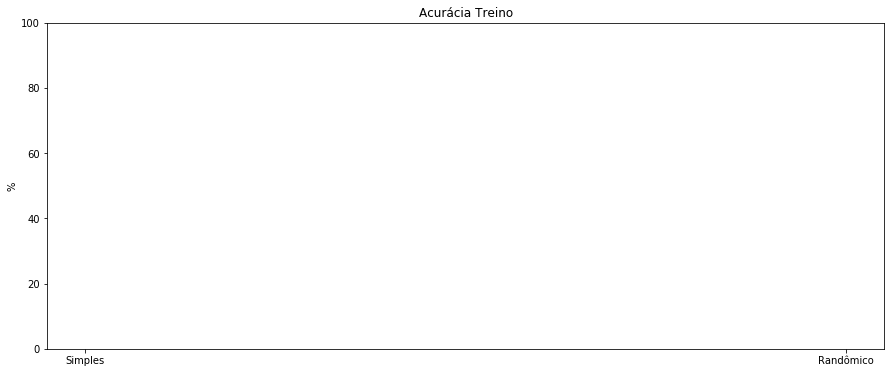

In [303]:
def plot_acuracias(nomes_modelos, acuracias, paleta, titulo, rot=0):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.set_ylim(0, 100)
    ax.set_title(titulo)
    ax.set_ylabel("%")
    
    rects = ax.bar(
        nomes_modelos,
        acuracias,
        color=paleta,
        rotation=rot
    )
    for rect in rects:
        height = rect.get_height()
        ax.annotate("{:.3f}".format(float(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    ha="center", va='bottom')
plot_acuracias(
    ["Simples", "Randômico", "Árvore 1", "Árvore 2"], 
    [100*acc_simples, 100*acc_randomica, 100*acc_arvore1, 100*acc_arvore2],
    PALETA,
    "Acurácia Treino"
)

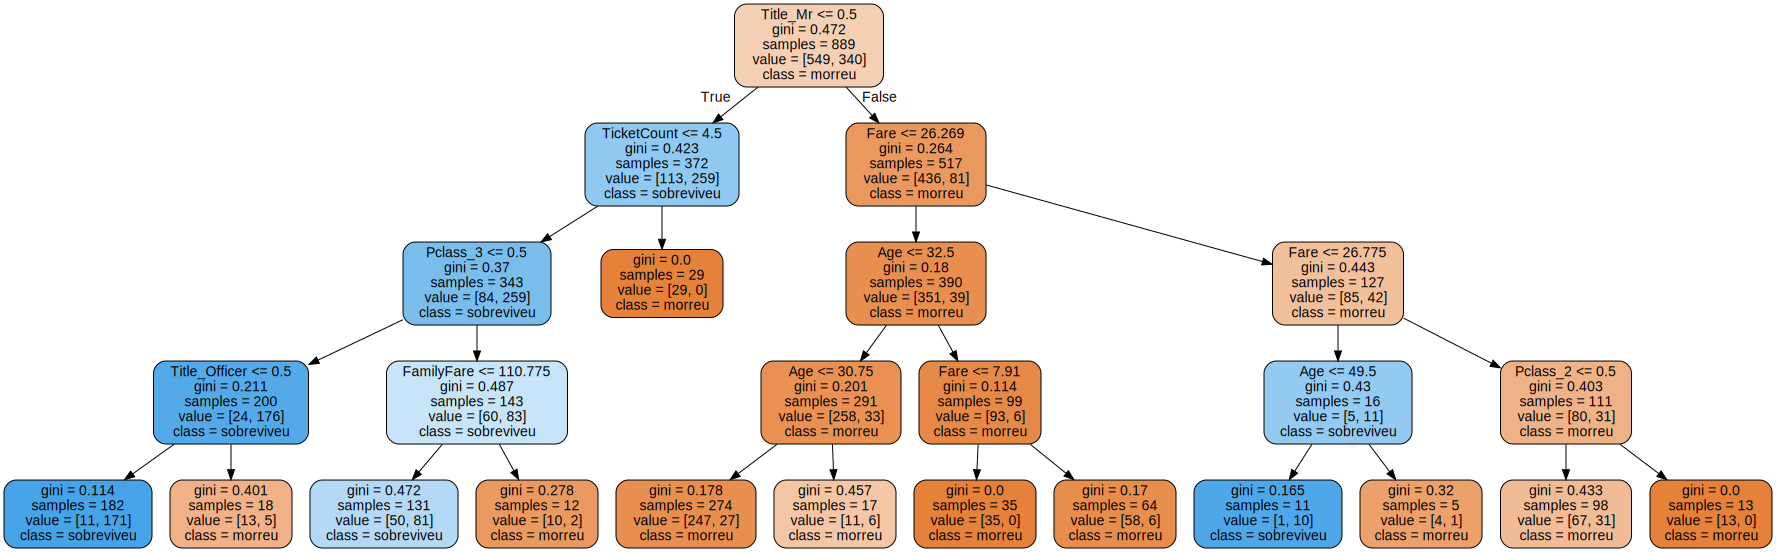

In [260]:
plot_tree(modelo_arvore2, X2.columns, classes)

Algumas conclusões que podemos tomar com base nesta árvore:
* Cerca de 15.6% dos passageiros do sexo masculino (`Title` $=$ _Mr_ ) sobreviveram. Estes resultados são similares aos encontrados no final do capítulo 2.
* 94% Dos passageiros que não pertencem às categorias: `Title` $=$ _Mr e Officer_; e `PClass` $=$ _3_ sobreviveram.
* Entre os homens (`Title` $=$ _Mr_ ), os passageiros da primeira classe (`PClass` $!=$ _2_ e `Fare` $>$ _26.775 ) foram os que mais sobreviveram (taxa de 31.6%, o dobro da taxa para homens).

---
## Exercícios
### E5.
Altere as características selecionadas para a modelagem e tente interpretar as árvores de decisão

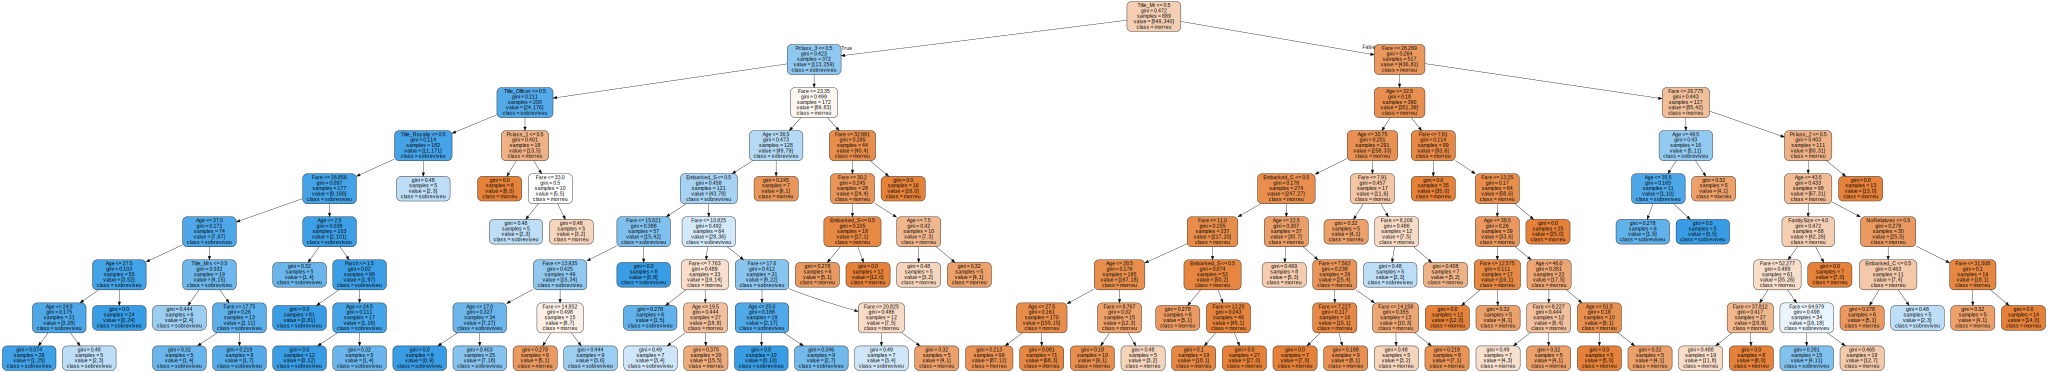

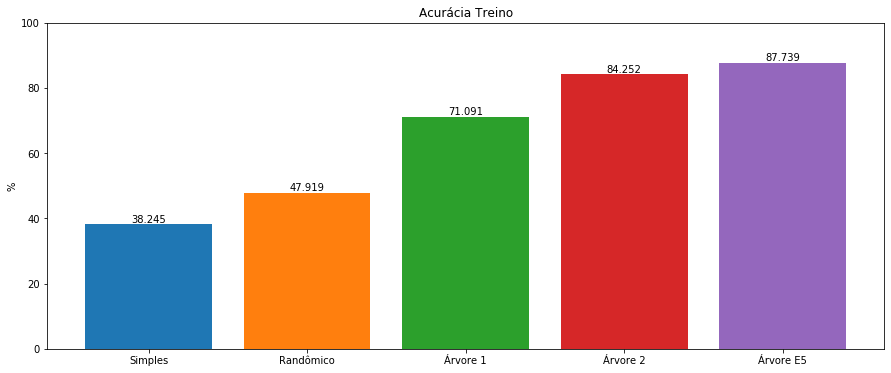

In [274]:
## Altere as características de interesse ou até crie novas características.

colunas_binarias_e5 = ["Sex", "NoRelatives", "Young"]
colunas_categoricas_e5 = ["Pclass", "Embarked", "Title"]
colunas_numericas_e5 = ["Age", "SibSp", "Parch", "Fare", "FamilySize"]
colunas_descartadas = ["TicketCount", "FamilyFare"]

profundidade = 8  # Profundidade da árvore
minimo_amostras_por_folha = 5 # Quantidade mínima de dados por folha

## -------------- ##
## Não altere o código abaixo
XE5 = processar_dataframe(df, colunas_binarias_e5, colunas_categoricas_e5, colunas_numericas_e5)
YE5 = df["Survived"]

modelo_arvoree5 = tree.DecisionTreeClassifier(max_depth=profundidade, min_samples_leaf=minimo_amostras_por_folha)
modelo_arvoree5.fit(XE5, YE5)
df["predicao arvore e5"] = modelo_arvoree5.predict(XE5)

acc_arvoree5 = metrics.accuracy_score(
    df["Survived"], 
    df["predicao arvore e5"]
)

plot_acuracias(
    ["Simples", "Randômico", "Árvore 1", "Árvore 2", "Árvore E5"], 
    [100*acc_simples, 100*acc_randomica, 100*acc_arvore1, 100*acc_arvore2, 100*acc_arvoree5],
    PALETA,
    "Acurácia Treino"
)

plot_tree(modelo_arvoree5, XE5.columns, classes)

# 6. Teste de resistência
![Afundando](dados/Stöwer_Titanic.jpg)


Nós conseguimos modelar os dados que tínhamos em mãos, mas será que esse conhecimento generaliza para o conjunto de testes?

Vamos tentar gerar portanto a coluna `Survived` para o conjunto de testes `df_teste`. Primeiro precisamos aplicar as mesmas transformações que fizemos para o _conjunto de treino_ `df`.

In [282]:
df_teste = pd.read_csv(ARQUIVO_TESTE)

df_teste["Age"] = df_teste["Age"].fillna(df["Age"].median())
df_teste["Fare"] = df_teste["Fare"].fillna(df["Fare"].median())

df_teste["Prefix"] = df_teste["Name"].str.extract(expressao_titulo)
df_teste["Title"] = df_teste["Prefix"].apply(substituir_titulos)

df_ticket_teste = df_teste.groupby(["Ticket"])[["Name"]].count()
df_ticket_teste = df_ticket_teste.rename(columns={"Name": "TicketCount"})
df_teste = pd.merge(df_teste, df_ticket_teste, left_on="Ticket", right_index=True).sort_index()

df_teste["Young"] = df_teste["Age"] < 16

df_teste["FamilySize"] = df_teste["SibSp"] + df_teste["SibSp"]
df_teste["FamilyFare"] = df_teste["FamilySize"] * df_teste["Fare"]
df_teste["NoRelatives"] = df_teste["FamilySize"] == 0

X_teste1 = df_teste[["Age", "SibSp", "Parch", "Fare"]]

X_teste2 = processar_dataframe(df_teste, colunas_binarias, colunas_categoricas, colunas_numericas)
X_teste2["Title_Royalty"] = 0
X_teste2 = X_teste2[X2.columns]
X_teste2.head()

,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Sex_male,NoRelatives,Young,Age,SibSp,Parch,Fare,TicketCount,FamilySize,FamilyFare
0,0,0,1,0,1,0,0,0,1,0,...,True,True,False,34.5,0,0,7.8292,1,0,0.000
1,0,0,1,0,0,1,0,0,0,1,...,False,False,False,47.0,1,0,7.0000,1,2,14.000
2,0,1,0,0,1,0,0,0,1,0,...,True,True,False,62.0,0,0,9.6875,1,0,0.000
3,0,0,1,0,0,1,0,0,1,0,...,True,True,False,27.0,0,0,8.6625,1,0,0.000
4,0,0,1,0,0,1,0,0,0,1,...,False,False,False,22.0,1,1,12.2875,1,2,24.575


Em seguida, com os mesmos modelos podemos gerar predições, vamos armazenar as predições nas mesmas colunas criadas anteriormente. 

Finalmente, podemos enviar os dados para o _Kaggle_ para testar e ver qual a taxa de acerto. Para simplificar esse processo estamos fornecendo a função `verificar_respostas` que recebe um `DataFrame` e a coluna das respostas e retorna a acurácia do modelo.

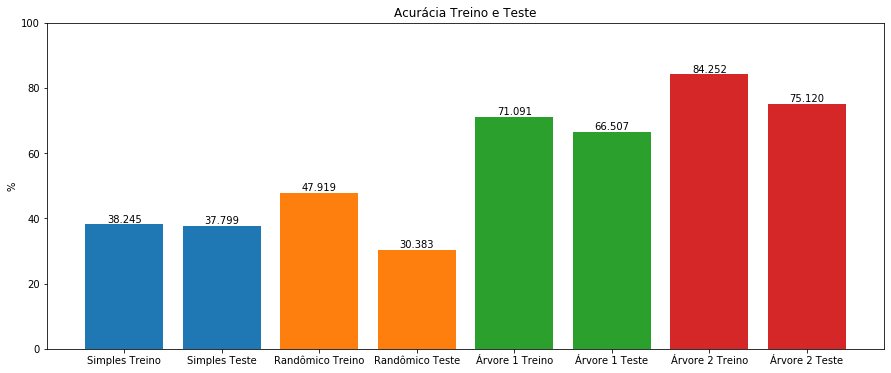

In [294]:
from respostas import verificar_respostas
random.seed(1912)
df_teste["predicao simples"] = 1
df_teste["predicao randomica"] = [random.randint(0, 2) for i in range(len(df_teste))]
df_teste["predicao arvore 1"] = modelo_arvore1.predict(X_teste1)
df_teste["predicao arvore 2"] = modelo_arvore2.predict(X_teste2)

acc_teste_simples = verificar_respostas(df_teste, "predicao simples")
acc_teste_randomica = verificar_respostas(df_teste, "predicao randomica")
acc_teste_arvore1 = verificar_respostas(df_teste, "predicao arvore 1")
acc_teste_arvore2 = verificar_respostas(df_teste, "predicao arvore 2")

plot_acuracias(
    ["Simples Treino", "Simples Teste", "Randômico Treino", "Randômico Teste", 
     "Árvore 1 Treino", "Árvore 1 Teste", "Árvore 2 Treino", "Árvore 2 Teste"], 
    [100*acc_simples, 100*acc_teste_simples, 100*acc_randomica, 100*acc_teste_randomica, 
     100*acc_arvore1, 100*acc_teste_arvore1, 100*acc_arvore2, 100*acc_teste_arvore2],
    [PALETA[0]]*2 + [PALETA[1]]*2+[PALETA[2]]*2 + [PALETA[3]]*2,
    "Acurácia Treino e Teste"
)

Percebemos que a acurácia no _conjunto de teste_ para os modelos de árvore são sempre menores. Isso se deve ao fato de que o conhecimento modelado no _conjunto de treino_ nem sempre é o que melhor representa a realidade.

Para algumas arquiteturas de modelo é possível modelar o _conjunto de treino_ perfeitamente, ou seja, obter uma acurácia de 100%, entretanto esse valor não representa a distribuição total dos dados, e a acurácia no conjunto de testes pode ser até pior que a de alguns modelos mais simples.

---
## Exercícios
### E6.
Veja a acurácia do modelo criado no **exercício 5**, não é preciso editar o código abaixo. Se desejar continue alterando o modelo **E5** e veja a diferença na acurácia de teste aqui:

In [302]:
X_testeE6 = processar_dataframe(df_teste, colunas_binarias_e5, colunas_categoricas_e5, colunas_numericas_e5)
X_testeE6["Title_Royalty"] = 0
X_testeE6 = X_testeE6[XE5.columns]
df_teste["predicao arvore e5"] = modelo_arvoree5.predict(X_testeE6)

acc_teste_arvoree5 = verificar_respostas(df_teste, "predicao arvore e5")

plot_acuracias(
    ["Simples Treino", "Simples Teste", "Randômico Treino", "Randômico Teste", "Árvore 1 Treino", 
     "Árvore 1 Teste", "Árvore 2 Treino", "Árvore 2 Teste", "Árvore E5 Treino", "Árvore E5 Teste"], 
    [100*acc_simples, 100*acc_teste_simples, 100*acc_randomica, 100*acc_teste_randomica, 100*acc_arvore1, 
     100*acc_teste_arvore1, 100*acc_arvore2, 100*acc_teste_arvore2, 100*acc_arvoree5, 100*acc_teste_arvoree5],
    [PALETA[0]]*2 + [PALETA[1]]*2+[PALETA[2]]*2 + [PALETA[3]]*2 + [PALETA[4]]*2,
    "Acurácia Treino e Teste",
    rot=15
)

TypeError: plot_acuracias() got an unexpected keyword argument 'rot'

# Afundando!
<img src="dados/jack.gif" width="800px">